In [27]:
import pandas as pd

# loading data
data = pd.read_csv('outputs/evaluation_output.csv')
data['run'] = 1
n_runs = 10
n_nodes = 11

for i in range(1,n_runs):
    temp = pd.read_csv('outputs/evaluation_output_{}.csv'.format(i))
    temp['run'] = i+1
    data = data.append(temp)

display(data)

,nodeId,roundId,good,seqNum,active,light,value,readyOut,run
0,10,12,False,139,True,False,0,0,1
1,11,12,True,117,False,False,0,0,1
2,6,12,False,139,True,False,0,0,1
3,1,12,False,139,True,False,0,0,1
4,3,12,False,139,True,False,0,0,1
...,...,...,...,...,...,...,...,...,...
6,5,12,False,139,True,False,0,0,10
7,6,12,False,139,True,False,0,0,10
8,10,12,False,139,True,False,0,0,10
9,1,12,False,139,True,False,0,0,10


In [51]:
counts = pd.DataFrame(range(n_runs), columns=['run'])
# counting number of messages sent by good and bad nodes
message_counts = data.groupby(['run', 'good'])['seqNum'].sum().reset_index()
counts['count_bad'] = message_counts[message_counts['good'] == False]['seqNum'].values
counts['count_good'] = message_counts[message_counts['good'] == True]['seqNum'].values
counts['count'] = counts['count_bad'] + counts['count_good']

display(counts)

,run,count_bad,count_good,count
0,0,1390,117,1507
1,1,1390,117,1507
2,2,1390,117,1507
3,3,1500,150,1650
4,4,1390,117,1507
5,5,1390,117,1507
6,6,1390,117,1507
7,7,1500,150,1650
8,8,1500,150,1650
9,9,1390,117,1507


In [47]:
import numpy as np

O = []

# Compute the complexity limit for number of messages sent
for _, run in counts.iterrows():
    T = min(n_nodes^2, run['count_bad'])
    O.append((T+n_nodes)*np.log(n_nodes))
    
print(O)

[47.95790545596741, 47.95790545596741, 47.95790545596741, 47.95790545596741, 47.95790545596741, 47.95790545596741, 47.95790545596741, 47.95790545596741, 47.95790545596741, 47.95790545596741]


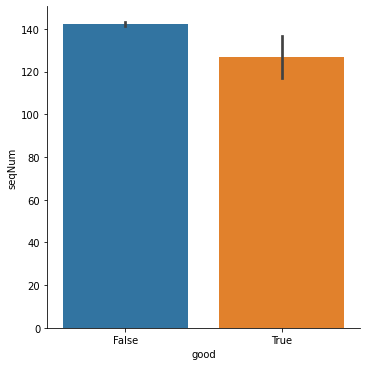

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x='good', y='seqNum', kind='bar', data=data)
plt.ylim(0)

plt.show()

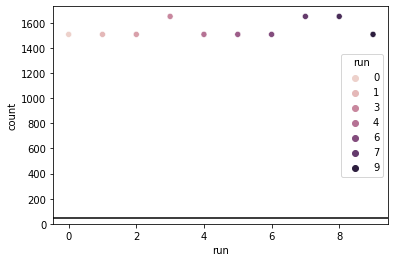

In [53]:
sns.scatterplot(x='run', y='count', data=counts, hue='run')
plt.axhline(O[0], color='k', label='Assumed complexity')
plt.ylim(0)
plt.show()

In [54]:
from scipy import stats

stats.ttest_ind(counts['count_good'], counts['count_bad'])

Ttest_indResult(statistic=-73.88294255018782, pvalue=8.312047269871738e-24)